<a href="https://colab.research.google.com/github/Aarunimaa/CodSoft-Internship-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this project the method of Random Forest Classification has been used to predict whether a transaction is fraudulent or not in this Credit Card Fraud Detection dataset.**

### **Loading data and packages**

Importing the required packages and modules

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from imblearn.combine import SMOTEENN

Mounting the drive and reading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/CODSOFT/creditcard.csv')

### **Initial Data Overview**

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

There are 284807 number of transactions. There are 31 columns of which 30 are feature variables and the column 'Class' is our target variable.

***Data Description***

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are **no missing values** in this dataset.

### **Quick EDA**

First we will plot a **pie chart** showing the percentage distributions of the fraudulent and legal transactions present in the dataset.

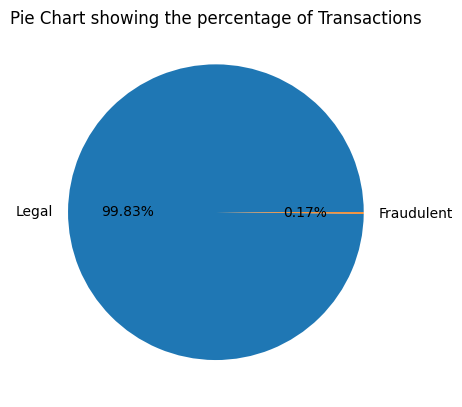

In [41]:
labels = 'Legal', 'Fraudulent'
sizes = [df.Class[df['Class']==0].count(), df.Class[df['Class']==1].count()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Pie Chart showing the percentage of Transactions",pad=0.000001)
plt.show()

From the pie chart it is clearly seen that there is a high imbalance between the number of legal transactions and fradulent transactions in the dataset.

Therefore, we will be considering both the undersampling and SMOTEENN techniques to fit our model and compare the two techniques used to see which one is a better fit for this type of data.

Next, we will plot a **barplot** to visualize the amounts of transactions.

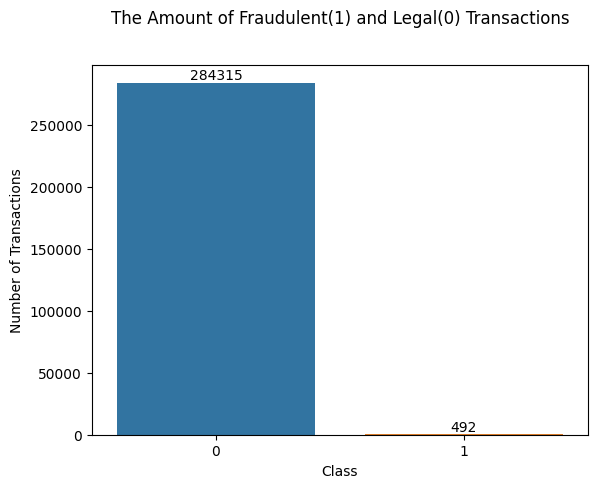

In [ ]:
s=sns.countplot(x='Class',data=df)
abs_values = df['Class'].value_counts(ascending=False).values
s.bar_label(container=s.containers[0], labels=abs_values)
plt.title('The Amount of Fraudulent(1) and Legal(0) Transactions',pad=30)
plt.ylabel('Number of Transactions')
plt.show()

Now we will plot a heatmap to visualize the correlation of all the feature varibales with our target variable.

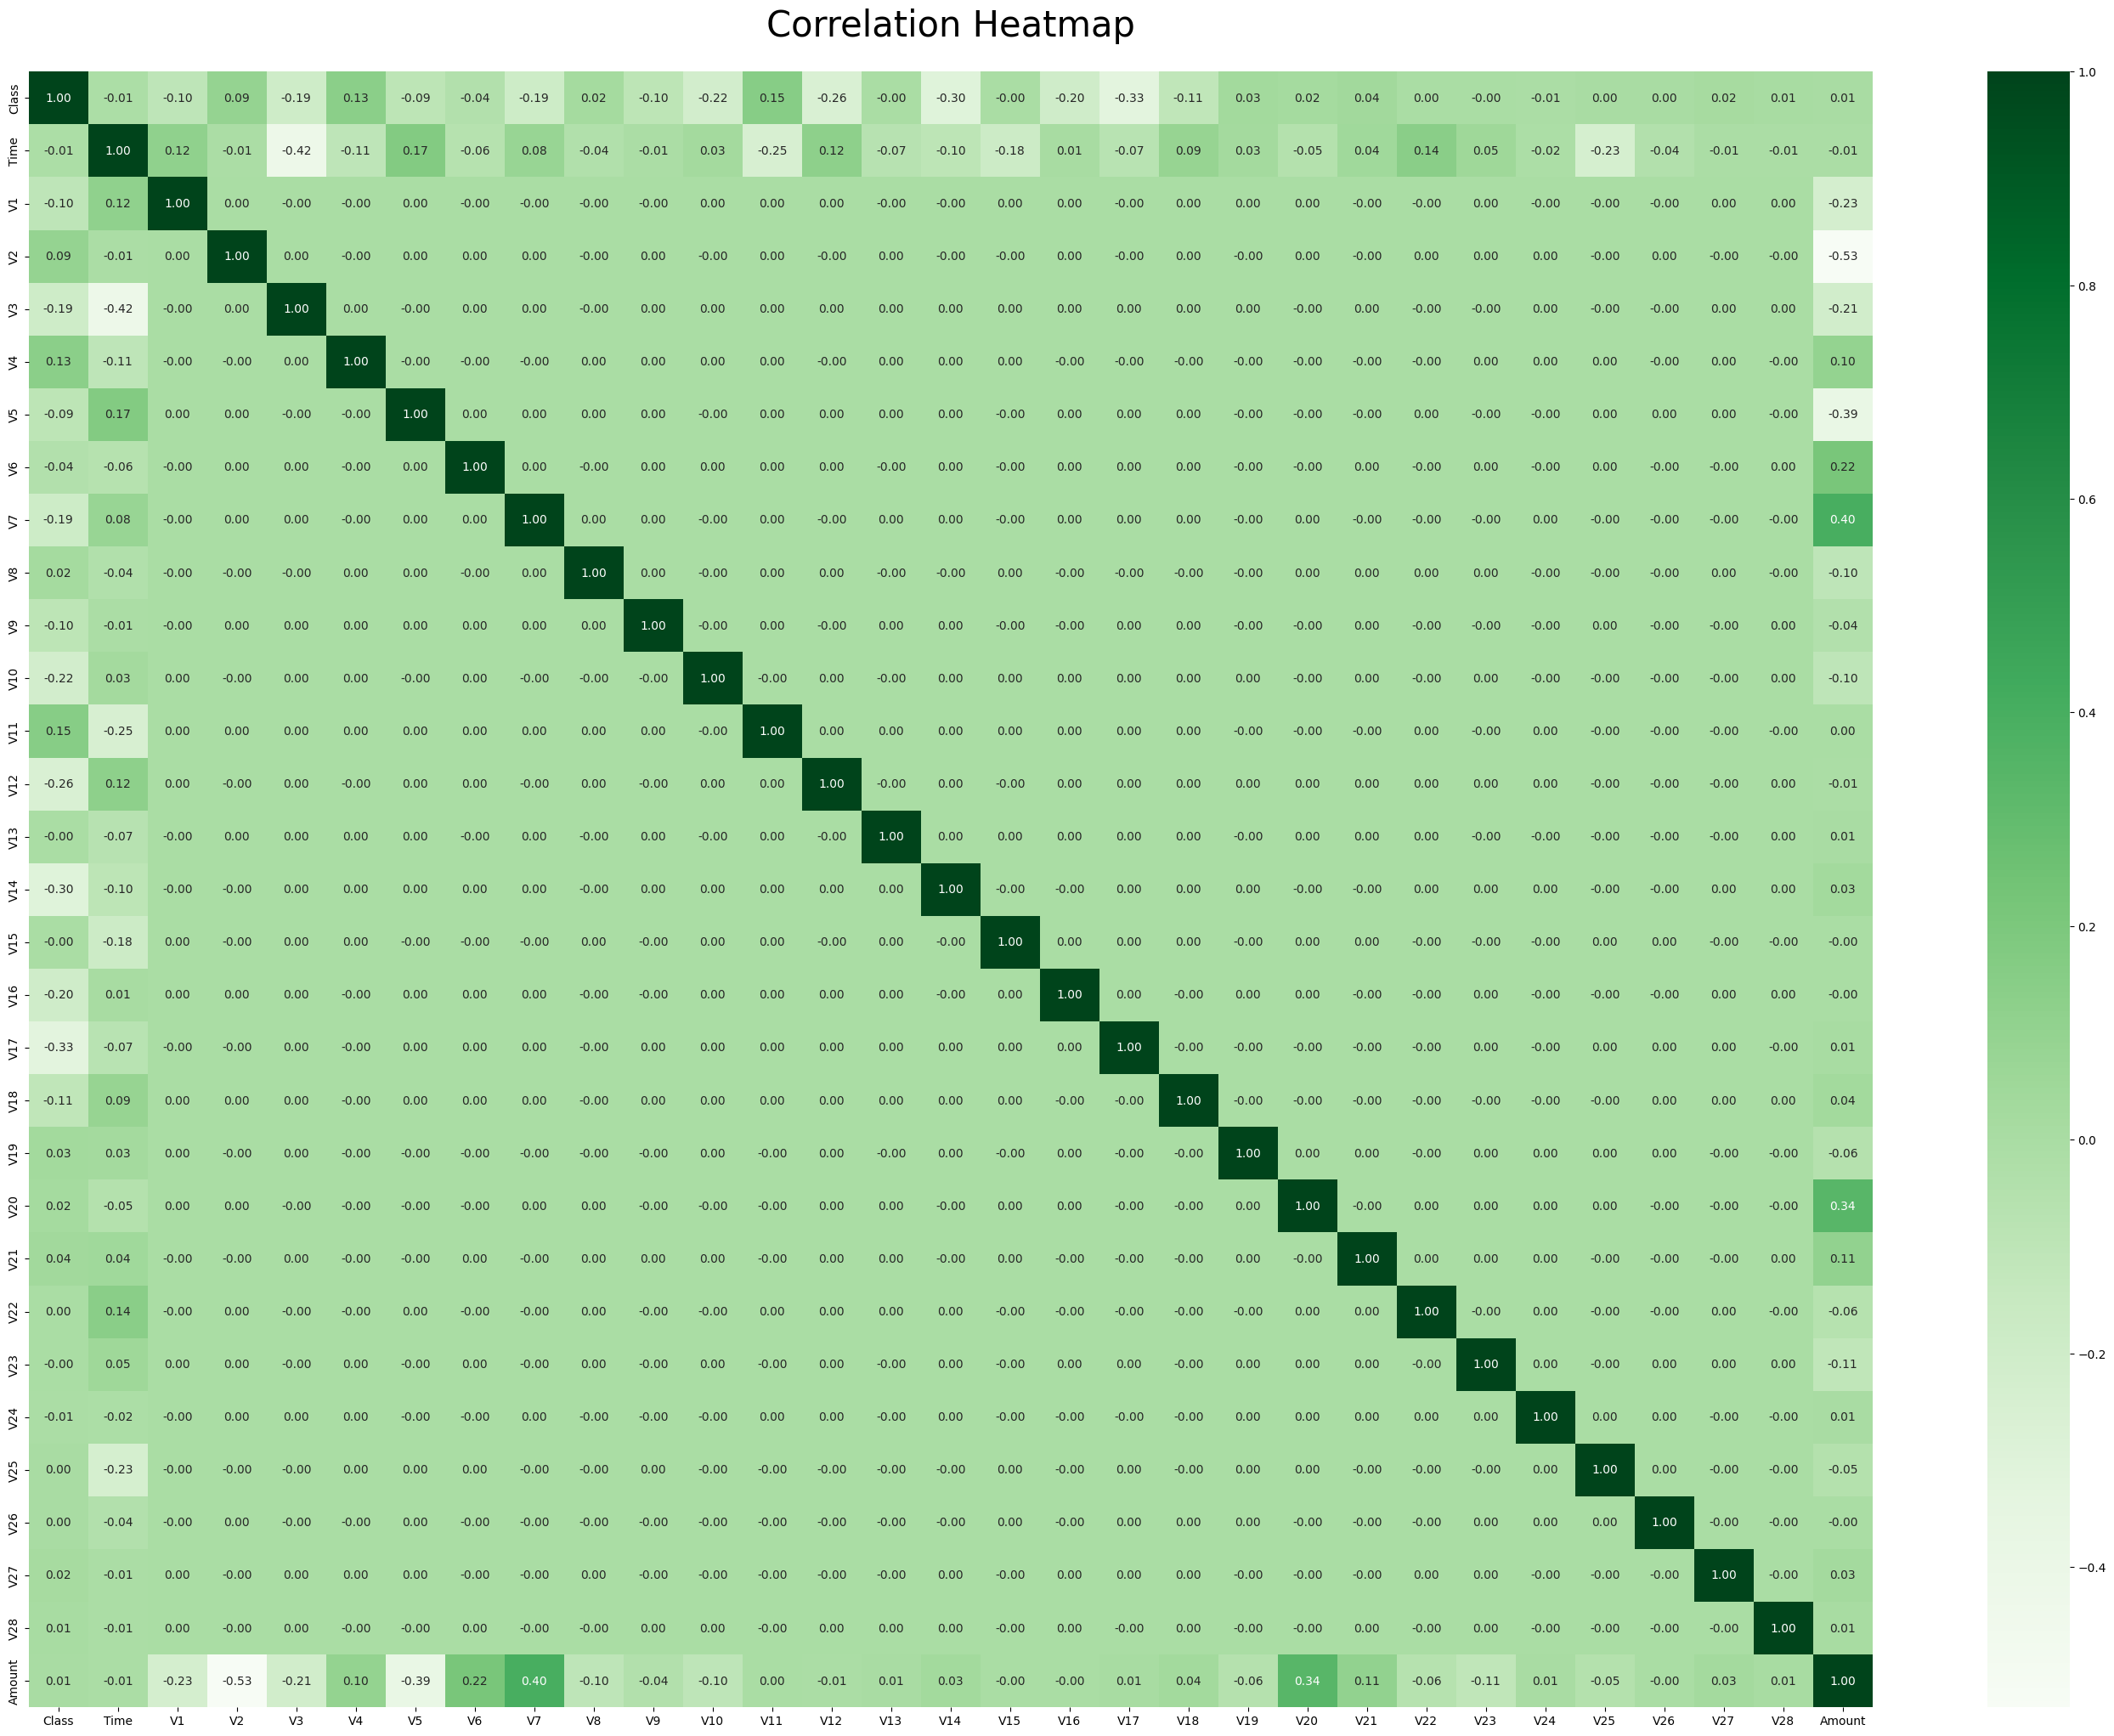

In [ ]:
feature=df.drop(['Class'],axis=1)
df1=pd.concat([df.Class,feature],axis=1)

plt.figure(figsize=(35,25))
sns.heatmap(df1.corr(),annot=True,cmap='Greens',fmt='0.2f')
plt.title('Correlation Heatmap',fontsize=30, pad=30)
plt.show()

We can see almost all the fearue variables have a correlation with the target variable to be taken into account. So we include all of them into our model.

### **Data Processing**

We are now ready to proceed with data processing.

***Selecting target variable and feature variables***

In [7]:
target=df.Class
feature=df.drop(['Class'],axis=1)
print(target.head())
print(feature.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.79

### **Model Fitting**

***Using Under Sampling Technique***

Under-sampling involves reducing the number of instances in the majority class (legal transactions) to balance the dataset with the minority class (fraudulent transactions). \
The goal is to randomly remove instances from the majority class until a balanced distribution is achieved. By reducing the number of majority class samples, the classifier can give more attention to the minority class during training.

In [8]:
legal = df[df.Class == 0]
fraud = df[df.Class == 1]

legal_samp=legal.sample(n=492)
undersamp_df = pd.concat([legal_samp , fraud], axis = 0)
undersamp_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
34610,37749.0,1.058759,0.444907,0.737377,2.264489,0.178599,0.722643,-0.167780,0.350998,-0.938757,...,-0.147664,-0.486822,0.200577,-0.345122,0.057016,-0.222715,0.020188,0.010503,1.00,0
272768,165260.0,1.999483,-0.896471,0.096885,-1.387710,-1.425590,-0.703378,-1.096352,-0.014556,2.554331,...,0.261084,1.095838,0.172189,0.056141,-0.323300,-0.179317,0.078686,-0.027368,9.99,0
222306,142921.0,2.028051,0.005795,-1.420277,0.141980,0.359333,-0.615395,0.183424,-0.231251,0.150564,...,0.309887,1.026889,0.008735,0.831393,0.288248,-0.168898,-0.022123,-0.057938,7.65,0
156475,108183.0,2.000020,-0.140421,-1.528333,0.293469,0.419263,-0.370703,-0.019160,-0.174924,1.775551,...,0.126690,0.578062,-0.032282,0.301457,0.238617,-0.178156,-0.068744,-0.067725,38.00,0
105840,69713.0,1.054433,-0.073748,-0.132470,1.061505,0.457117,0.848420,0.089035,0.147348,0.002402,...,-0.072124,-0.144673,-0.295594,-1.118732,0.782299,-0.267768,0.024274,0.008826,85.98,0


***Splitting the data into training and test dataset and fitting the model***

In [9]:
undersamp_feature=undersamp_df.drop(['Class'],axis=1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(undersamp_feature, undersamp_df.Class, test_size = 0.25, random_state = 50)

***Scaling the data***

In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

***Fitting the model and testing its accuracy***

In [ ]:
model = RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test)

In [38]:
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       118
           1       0.53      1.00      0.69       128

    accuracy                           0.53       246
   macro avg       0.76      0.51      0.37       246
weighted avg       0.75      0.53      0.38       246



**Precision** is the ratio of correctly predicted positive instances to the total instances predicted as positive. It measures the accuracy of the model in classifying positive instances. High precision indicates low false positive rate.

**Recall** or **Sensitivity** or **True Positive Rate (TPR)** is the ratio of correctly predicted positive instances to the total actual positive instances. It measures the model's ability to correctly identify positive instances. High recall indicates low false negative rate.

**F1-score** is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. It is especially useful when dealing with imbalanced datasets, as it considers both false positives and false negatives.

**Support** is the number of actual occurrences of each class in the test set. It helps provide context for the other metrics, especially for imbalanced datasets.

**Accuracy** is the ratio of correctly predicted instances to the total instances in the dataset. It is a commonly used metric but can be misleading in imbalanced datasets.

**Macro-average** is the average of the metrics (precision, recall, F1-score) calculated independently for each class. It treats all classes equally, regardless of their frequency.

**Weighted Average** is the average of the metrics, where each class's contribution is weighted by its support. It gives more importance to classes with higher occurrences.

**Micro Average** is the average of the metrics calculated globally by counting the total true positives, false negatives, and false positives across all classes.





We plot the ***Precision-Recall Curve***.

A Precision-Recall curve is a graphical representation that illustrates the trade-off between precision and recall for different threshold values set by a classification model. It is particularly useful when dealing with imbalanced datasets where one class is much more frequent than the other. The curve helps us choose an appropriate threshold that balances precision and recall based on the specific requirements of your application.

The area under the pr curve is:  0.7633744855967078


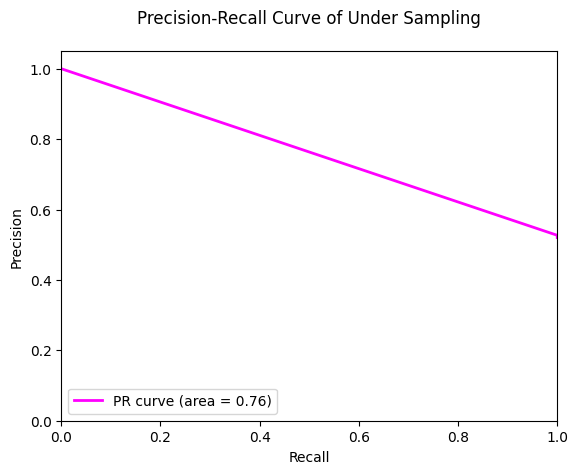

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print("The area under the pr curve is: ",pr_auc)
plt.plot(recall, precision, color='magenta', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Under Sampling',pad=20)
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

A PR AUC value around 0.76 suggests that the model has a relatively good performance in terms of precision and recall. It might correctly classify a significant portion of positive instances while keeping the number of false positives under control.

However, under-sampling has some drawbacks, such as potential information loss due to the removal of data and an increased risk of losing important patterns and features that could be crucial for accurate classification.

***Combining SMOTE with Under Sampling***

**Over-sampling** involves increasing the number of instances in the minority class by generating synthetic samples or replicating existing ones.\
 The goal is to balance the dataset by creating a larger representation of the minority class.\
  This can be achieved through a technique called **SMOTE (Synthetic Minority Over-sampling Technique)**.

Both under-sampling and over-sampling have their pros and cons. In practice, a **combination of both techniques** (a hybrid approach) or using more advanced methods like ensemble methods (e.g., **SMOTE combined with under-sampling**) often yields better results.

***SMOTEENN Technique***

The **SMOTE** component of SMOTEENN is used to oversample the minority class by generating synthetic samples that are similar to existing minority class samples. This helps balance the class distribution and alleviate the imbalance problem.

**ENN (Edited Nearest Neighbors)** is a data preprocessing technique used in the context of machine learning and classification tasks. It aims to improve the quality of training data by removing noisy and potentially mislabeled examples from the dataset. ENN focuses on the majority class instances and selectively removes instances that are considered "safe" to remove, thereby enhancing the decision boundary of a classifier.

In [17]:
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=50)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.25, random_state=50)

In [19]:
x_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train, y_train)

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

***Fitting the model and testing its accuracy***

In [27]:
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_s = model.predict(x_test_scaled)


Now we need to check how well this SMOTEENN (SMOTE + ENN) technique has imporved our model.

In [28]:
report2 = classification_report(y_test, y_pred_s)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.80      0.81       113

    accuracy                           1.00     71202
   macro avg       0.91      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



Finally we plot the ***Precision-Recall Curve***.

The area under the pr curve is:  0.8112356375098926


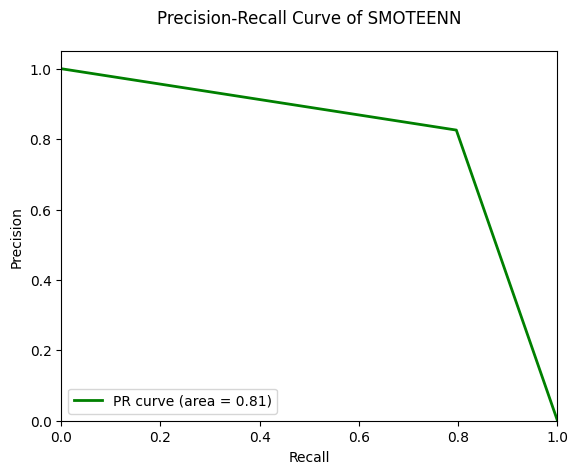

In [32]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_s)
pr_auc = auc(recall, precision)
print("The area under the pr curve is: ",pr_auc)
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of SMOTEENN',pad=20)
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

***Conculsion***

From the classification report scores, it is clearly visible that the SMOTEENN technique yields a better model which fits the data better than the undersampling technique.

It is also quite evident from the precision recall score graphs that fitting the model using a SMOTEENN technique gives a better prediction than just the undersampling technique.